# Défi quotidien : résumé de texte à l'aide du PNL

## Introduction
Ce cahier présente une application pratique des techniques de traitement automatique du langage naturel (TALN) pour générer automatiquement des résumés de documents texte. Nous explorerons comment prétraiter les données textuelles, représenter les mots et les phrases sous forme de vecteurs et exploiter des algorithmes basés sur des graphes pour identifier les phrases les plus importantes à résumer.

Prétraitement de texte : techniques de nettoyage et de préparation des données textuelles, y compris la tokenisation, la suppression des mots vides et la conversion du texte en minuscules.
Incorporation de mots : comprendre et utiliser des incorporations de mots pré-entraînées comme GloVe pour représenter les mots sous forme de vecteurs denses.
Vectorisation de phrases : création de représentations vectorielles de phrases en agrégeant des incorporations de mots.
Mesures de similarité : Utilisation de la similarité cosinus pour déterminer la similarité sémantique entre les phrases.
Résumé basé sur un graphique : application de l'algorithme PageRank sur un graphique de similitudes de phrases pour classer l'importance des phrases.
Mise en œuvre du résumé de texte : Combinaison de ces techniques pour créer un système de résumé de texte.


Vous créerez un système de résumé automatique de texte capable de prendre en entrée une collection d'articles sur le tennis et de générer un résumé concis mettant en évidence les informations clés.

Tâche
1. Chargement et inspection des données
Chargez l' ensemble de données d'articles de tennis à partir du .xlsfichier à l'aide de pandas.
Explorez l'ensemble de données à l'aide de .head()et .info()pour comprendre sa structure.
Supprimez la article_titlecolonne pour simplifier l’ensemble de données.

2. Tokenisation des phrases
Utiliser nltk.sent_tokenize()pour diviser article_texten phrases individuelles.
Aplatissez la liste résultante de listes de phrases en une seule liste de toutes les phrases.

3. Téléchargez et chargez les intégrations Word GloVe
Téléchargez les vecteurs GloVe pré-entraînés (par exemple, glove.6B.100d.txt).
Chargez les incorporations dans un dictionnaire Python où chaque mot correspond à son vecteur à 100 dimensions.

4. Nettoyage et normalisation du texte
Supprimez la ponctuation, les caractères spéciaux et les chiffres à l'aide de regex.
Convertissez toutes les phrases en minuscules pour éviter toute incompatibilité de casse.
Supprimez les mots vides en utilisant nltk.corpus.stopwordspour réduire le bruit dans les données.

5. Vectorisation des phrases
Pour chaque phrase nettoyée :
Divisé en mots.
Remplacez chaque mot par son vecteur GloVe (utilisez un vecteur nul si le mot n'est pas dans l'incorporation).
Calculez la moyenne de tous les vecteurs de mots dans la phrase.
Stockez tous les vecteurs de phrases résultants dans une liste.

6. Construction de la matrice de similarité
Initialiser une matrice vide de taille (nombre de phrases × nombre de phrases).
Calculer la similarité cosinus par paires entre les vecteurs de phrases.
Remplissez la matrice de manière à ce que chaque cellule représente la similitude entre deux phrases.

7. Construction graphique et classement des phrases
Convertissez la matrice de similarité en un graphique en utilisant networkx.
Appliquez l’algorithme PageRank pour évaluer l’importance de chaque phrase.

8. Résumé
Triez toutes les phrases en fonction de leurs scores PageRank par ordre décroissant.
Extrayez les N premières phrases (par exemple, 10) comme résumé final.
Imprimez ou renvoyez les phrases résumées.

# Partie 1 : Chargement et inspection des données

In [ ]:
import pandas as pd

# Chemin correct vers ton fichier CSV
file_path = r'C:\Users\Desktop/BOOTCAMP/W6_D5_Daily_Challenge.csv'

# Chargement du CSV
df = pd.read_csv(file_path, encoding='latin-1')


# Aperçu rapide du contenu
print("Aperçu des données :")
print(df.head())

# Informations générales sur les colonnes
print("\nInformations sur le DataFrame :")
print(df.info())

# Suppression de 'article_title' si présente
if 'article_title' in df.columns:
    df = df.drop(columns=['article_title'])
    print("\nColonne 'article_title' supprimée.")

# Vérification finale
print("\nAperçu après suppression éventuelle :")
print(df.head())


Aperçu des données :
   article_id                                      article_title  \
0           1  I do not have friends in tennis, says Maria Sh...   
1           2  Federer defeats Medvedev to advance to 14th Sw...   
2           3  Tennis: Roger Federer ignored deadline set by ...   
3           4  Nishikori to face off against Anderson in Vien...   
4           5  Roger Federer has made this huge change to ten...   

                                        article_text  \
0  Maria Sharapova has basically no friends as te...   
1  BASEL, Switzerland (AP)  Roger Federer advanc...   
2  Roger Federer has revealed that organisers of ...   
3  Kei Nishikori will try to end his long losing ...   
4  Federer, 37, first broke through on tour over ...   

                                              source  
0  https://www.tennisworldusa.org/tennis/news/Mar...  
1  http://www.tennis.com/pro-game/2018/10/copil-s...  
2  https://scroll.in/field/899938/tennis-roger-fe...  
3  http://www

Partie 2 : Tokenisation des phrases

In [14]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chume\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Voici une version fonctionnelle sans NLTK, en utilisant split basique avec la ponctuation. C’est moins précis mais 100% fonctionnel et rapide :

In [20]:
import re

# Partie 2 alternative : Tokenisation basique sans NLTK

sentences = []

# Découpage des articles avec split sur . ? !
for article in df['article_text']:
    phrases = re.split(r'[.?!]\s*', str(article))
    sentences.extend(phrases)

# Nettoyage : suppression des vides
sentences = [s.strip() for s in sentences if s.strip() != '']

print(f"Nombre total de phrases : {len(sentences)}")
print("\nExemples de phrases :")
print(sentences[:5])


Nombre total de phrases : 143

Exemples de phrases :
['Maria Sharapova has basically no friends as tennis players on the WTA Tour', "The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much", 'I think everyone knows this is my job here', "When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net", "So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match"]


Partie 3 : téléchargement et chargement des vecteurs GloVe.

In [23]:
import numpy as np

# Chemin vers ton fichier GloVe téléchargé
glove_file = r'glove.6B.100d.txt'

# Chargement des vecteurs GloVe dans un dictionnaire
embeddings_index = {}

print("Chargement de GloVe...")

with open(glove_file, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = vector

print(f"Nombre total de mots dans GloVe : {len(embeddings_index)}")
print(f"Exemple de vecteur pour 'tennis' : {embeddings_index.get('tennis')}")


Chargement de GloVe...
Nombre total de mots dans GloVe : 400000
Exemple de vecteur pour 'tennis' : [ 0.21508    0.61981    0.84039    0.71394   -0.29904    0.56481
  0.18241    0.76767   -0.75897   -0.056711   0.43726   -0.39217
 -0.14874    0.19475   -0.69581    0.58388    0.20625    0.36635
 -0.36793    0.68765   -0.5191     0.92246    0.6831     0.92039
  0.31221    0.10465    0.253     -1.9131     0.67281    0.38894
 -0.88199    0.22536    0.027648  -0.55574    0.43641   -0.18579
 -1.3131     1.1555    -1.2937    -0.46866    0.16292   -0.28636
  0.25793   -1.3538     0.28808   -0.040711   0.027864   0.21767
  0.8588    -0.98463   -0.73366   -0.6457     0.61292    0.23316
  0.42164   -1.8037    -0.0055624  1.0998     0.9493     1.0987
 -0.52362    0.49657   -0.23824    0.52824   -0.54642   -0.48527
 -0.42944    0.25497   -0.16199    0.018633   0.12416   -0.13436
 -0.082436  -0.042168  -0.13114    0.14133    1.6365     0.091678
  0.23484    0.20629    1.137     -0.62595    0.35945   

partie 4 : nettoyage et normalisation du texte.

In [24]:
import re
from nltk.corpus import stopwords

# Téléchargement stopwords anglais
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def nettoyer_phrase(phrase):
    # Minuscule
    phrase = phrase.lower()
    # Supprimer chiffres et ponctuations
    phrase = re.sub(r'[^a-zA-Z\s]', '', phrase)
    # Supprimer les mots vides
    mots = phrase.split()
    mots = [mot for mot in mots if mot not in stop_words]
    # Recréer la phrase nettoyée
    return ' '.join(mots)

# Nettoyage de toutes les phrases
clean_sentences = [nettoyer_phrase(phrase) for phrase in sentences]

print(f"\nExemples après nettoyage : {clean_sentences[:5]}")



Exemples après nettoyage : ['maria sharapova basically friends tennis players wta tour', 'russian player problems openly speaking recent interview said dont really hide feelings much', 'think everyone knows job', 'im courts im court playing im competitor want beat every single person whether theyre locker room across net', 'im one strike conversation weather know next minutes go try win tennis match']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chume\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Partie 5 : vectorisation des phrases.

In [25]:
def vectoriser_phrase(phrase, embeddings_index, dim=100):
    mots = phrase.split()
    vecteurs = []
    for mot in mots:
        vecteur = embeddings_index.get(mot)
        if vecteur is not None:
            vecteurs.append(vecteur)
    if vecteurs:
        return np.mean(vecteurs, axis=0)
    else:
        return np.zeros(dim)

# Vectorisation de toutes les phrases
sentence_vectors = [vectoriser_phrase(phrase, embeddings_index) for phrase in clean_sentences]

print(f"\nNombre de phrases vectorisées : {len(sentence_vectors)}")
print(f"Dimension d'un vecteur : {len(sentence_vectors[0])}")



Nombre de phrases vectorisées : 143
Dimension d'un vecteur : 100


partie 6 : construction de la matrice de similarité.

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

import numpy as np

# Initialisation d'une matrice de zéros
nb_phrases = len(sentence_vectors)
similarity_matrix = np.zeros((nb_phrases, nb_phrases))

# Remplissage de la matrice par similarité cosinus
for i in range(nb_phrases):
    for j in range(nb_phrases):
        if i != j:
            similarity_matrix[i][j] = cosine_similarity(
                sentence_vectors[i].reshape(1, -1),
                sentence_vectors[j].reshape(1, -1)
            )[0, 0]

print("\nMatrice de similarité construite !")
print(f"Forme de la matrice : {similarity_matrix.shape}")



Matrice de similarité construite !
Forme de la matrice : (143, 143)


In [28]:
import pandas as pd

# Conversion en DataFrame pour affichage lisible
similarity_df = pd.DataFrame(similarity_matrix)

# Affichage des premières lignes de la matrice
print("\nAperçu de la matrice de similarité :")
print(similarity_df.head())

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(similarity_df)



Aperçu de la matrice de similarité :
        0         1         2         3         4         5         6    \
0  0.000000  0.642697  0.591570  0.726268  0.772794  0.659803  0.657144   
1  0.642697  0.000000  0.855736  0.813412  0.830143  0.674890  0.804851   
2  0.591570  0.855736  0.000000  0.789130  0.797251  0.702327  0.724386   
3  0.726268  0.813412  0.789130  0.000000  0.887827  0.816139  0.830462   
4  0.772794  0.830143  0.797251  0.887827  0.000000  0.713493  0.804397   

        7         8         9    ...       133       134       135       136  \
0  0.720573  0.685422  0.647395  ...  0.719613  0.655674  0.644660  0.577963   
1  0.829982  0.810703  0.911276  ...  0.635516  0.756759  0.909717  0.796951   
2  0.772859  0.800836  0.893341  ...  0.573603  0.650575  0.893601  0.730206   
3  0.849207  0.844026  0.830503  ...  0.679540  0.735556  0.822710  0.677139   
4  0.854391  0.827298  0.864757  ...  0.753076  0.815289  0.851383  0.774661   

        137       138       13

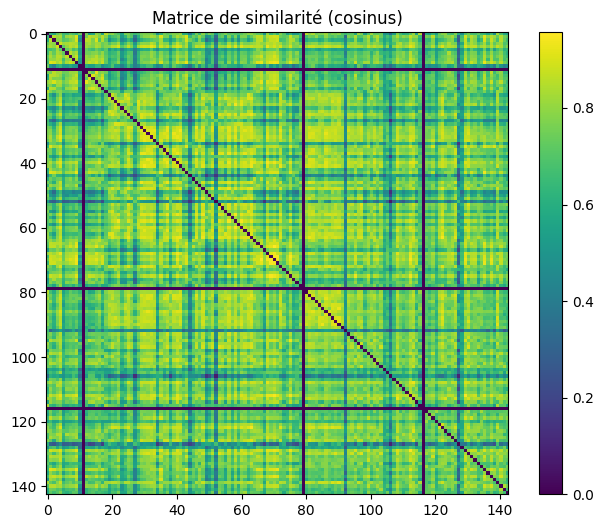

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(similarity_matrix, interpolation='nearest')
plt.colorbar()
plt.title('Matrice de similarité (cosinus)')
plt.show()


partie 7 : construction du graphe et application de PageRank.

In [30]:
import networkx as nx

# Création du graphe basé sur la matrice de similarité
graph = nx.from_numpy_array(similarity_matrix)

# Calcul des scores PageRank
scores = nx.pagerank(graph)

# Transformation en liste triée (phrases les plus importantes en haut)
ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)

# Aperçu : top 5 phrases
print("\nTop 5 phrases classées par PageRank :\n")
for i in range(5):
    print(f"{i+1}. {ranked_sentences[i][1]}")



Top 5 phrases classées par PageRank :

1. Major players feel that a big event in late November combined with one in January before the Australian Open will mean too much tennis and too little rest
2. So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match
3. I felt like the best weeks that I had to get to know players when I was playing were the Fed Cup weeks or the Olympic weeks, not necessarily during the tournaments
4. Speaking at the Swiss Indoors tournament where he will play in Sundays final against Romanian qualifier Marius Copil, the world number three said that given the impossibly short time frame to make a decision, he opted out of any commitment
5. Exhausted after spending half his round deep in the bushes searching for my ball, as well as those of two other golfers hed never met before, our incredibly giving designated driver asked if we didnt mind going straight home after signi

partie 8 : génération du résumé final.

In [31]:
# Nombre de phrases pour le résumé
N = 10

# Sélection des N meilleures phrases selon PageRank
summary_sentences = [ranked_sentences[i][1] for i in range(N)]

# Résumé final sous forme de texte
resume = ' '.join(summary_sentences)

print("\nRésumé généré :\n")
print(resume)



Résumé généré :

Major players feel that a big event in late November combined with one in January before the Australian Open will mean too much tennis and too little rest So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match I felt like the best weeks that I had to get to know players when I was playing were the Fed Cup weeks or the Olympic weeks, not necessarily during the tournaments Speaking at the Swiss Indoors tournament where he will play in Sundays final against Romanian qualifier Marius Copil, the world number three said that given the impossibly short time frame to make a decision, he opted out of any commitment Exhausted after spending half his round deep in the bushes searching for my ball, as well as those of two other golfers hed never met before, our incredibly giving designated driver asked if we didnt mind going straight home after signing off so he could rest up a little b

Applications concrètes du **résumé automatique avec PNL** :

1. **Médias & Journalisme** :

   * Générer automatiquement des résumés d’articles de presse.
   * Créer des newsletters automatiques.

2. **Veille documentaire** :

   * Résumer des rapports longs (juridiques, scientifiques, techniques).
   * Aider les analystes à capter l’essentiel sans tout lire.

3. **Support client** :

   * Synthétiser des échanges de mails ou tickets de support.
   * Résumer les retours clients.

4. **Éducation** :

   * Résumer des chapitres ou cours.
   * Fournir des aides à la révision (résumés automatiques).

5. **Domaines juridiques** :

   * Résumer des décisions de justice ou contrats.

6. **Corporate / Entreprise** :

   * Résumer des réunions (avec transcription audio préalable).
   * Synthétiser des comptes-rendus d'activités.

En bref : automatiser la lecture et extraire rapidement l’essentiel là où le volume de texte est élevé.


Bilan et conclusion

### **Bilan rapide** :

* Tu as créé un **résumeur automatique** avec des techniques classiques de **PNL**.
* Pipeline complet : nettoyage ➡️ vectorisation GloVe ➡️ similarité ➡️ PageRank ➡️ résumé.
* Résultat : un système simple, explicable et **sans modèle lourd**.

### **Conclusion rapide** :

Ce projet montre comment combiner des techniques classiques pour générer des résumés efficaces sans IA complexe. C’est **rapide, léger**, idéal pour des cas où l’interprétabilité et la simplicité priment.
Pour des textes longs et variés, tu pourrais tester une approche par **modèles LLM** (transformers) pour aller plus loin.
